<a href="https://colab.research.google.com/github/YoussefMhasni/TP_ML/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.set_printoptions(threshold=10000, suppress = True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('creditcard.csv')
df1=df.drop('Time',axis=1)

In [ ]:
df1.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Text(0.5, 1.0, 'Transactions')

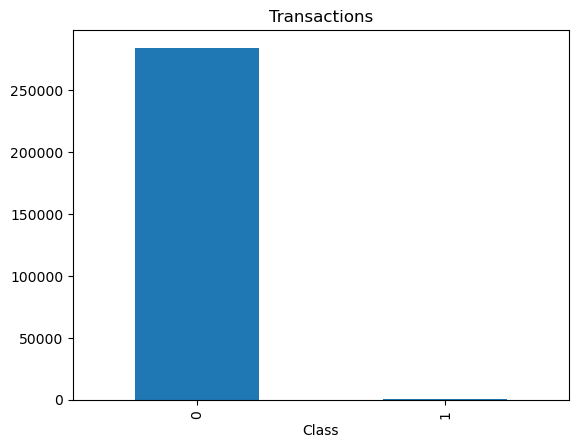

In [ ]:
count_classes = pd.value_counts(df['Class'])
count_classes.plot(kind = 'bar')
plt.title("Transactions")

<Axes: >

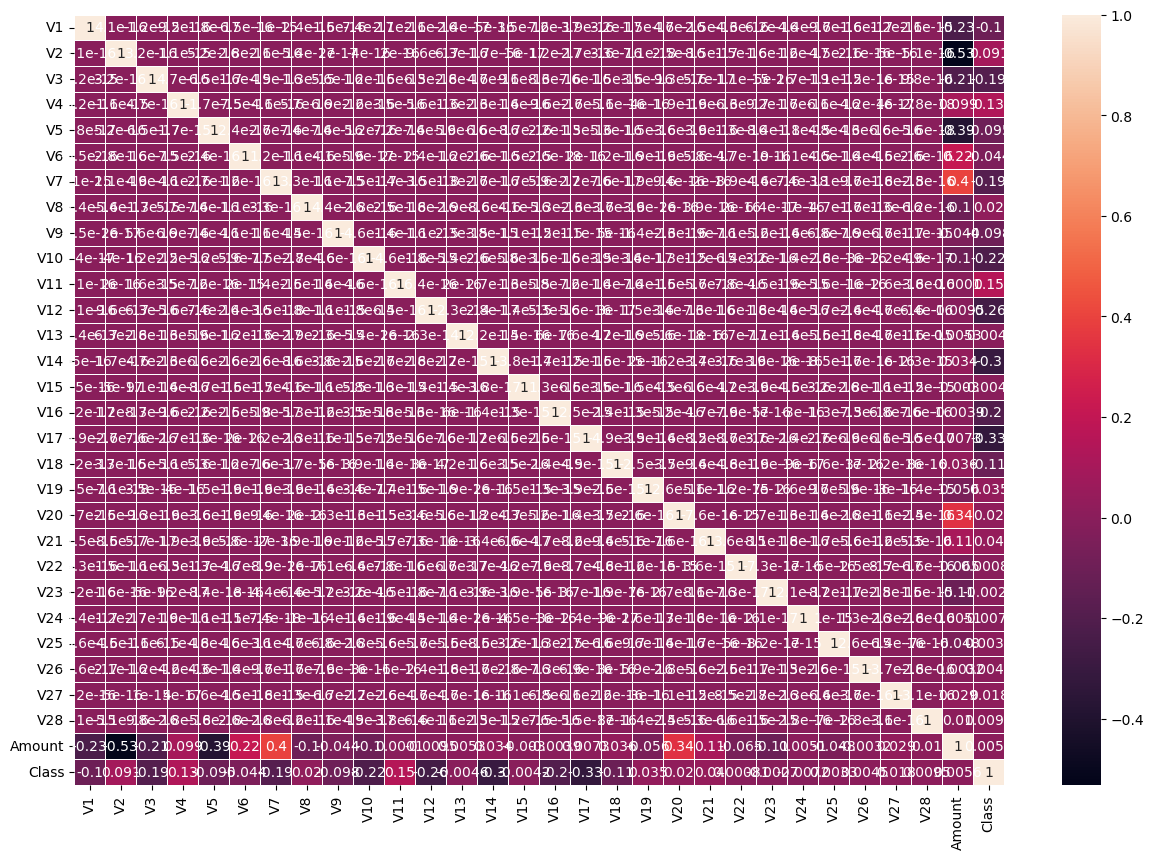

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
Matrix_cor=df1.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(Matrix_cor, annot=True, linewidths=.5, ax=ax)

In [ ]:
from sklearn.model_selection import train_test_split
X = df1.drop('Class',axis=1)
y=df1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
y_train.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

## RF

In [ ]:
#RF sans normalisation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model_nn = RandomForestClassifier(n_estimators=100, random_state=42)
model_nn.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
F1_score_not_normalised= f1_score(y_test, y_pred)
F1_score_not_normalised

0.8367346938775511

In [ ]:
#RF avec normalisation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)
from sklearn.metrics import f1_score
F1_score= f1_score(y_test, y_pred)
F1_score

0.8804347826086957

Text(0.5, 1.0, 'Matrice de Confusion')

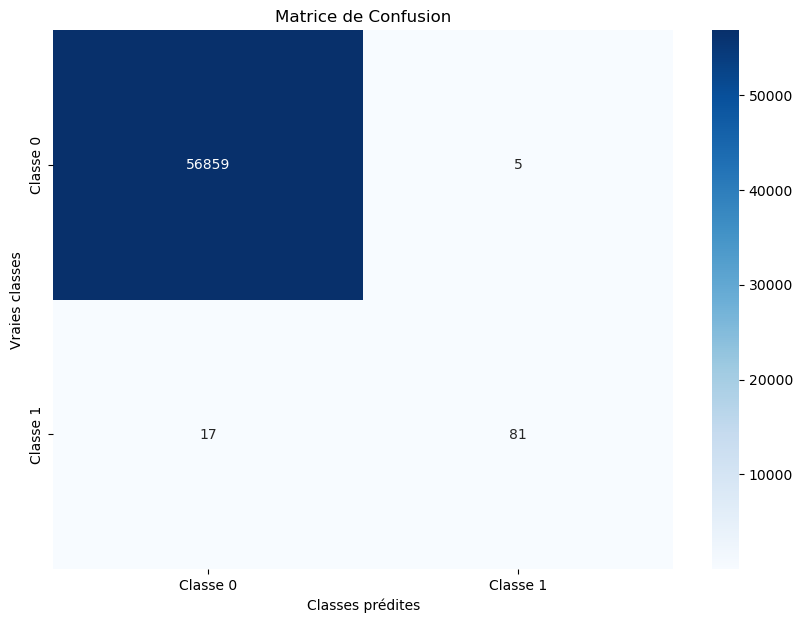

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))

sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues',xticklabels=['Classe 0', 'Classe 1'],yticklabels=['Classe 0', 'Classe 1'])
plt.ylabel('Vraies classes')
plt.xlabel('Classes prédites')
plt.title('Matrice de Confusion')

## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train_normalized, y_train)
y_pred = mlp_model.predict(X_test_normalized)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.8135593220338984


Text(0.5, 1.0, 'Matrice de Confusion')

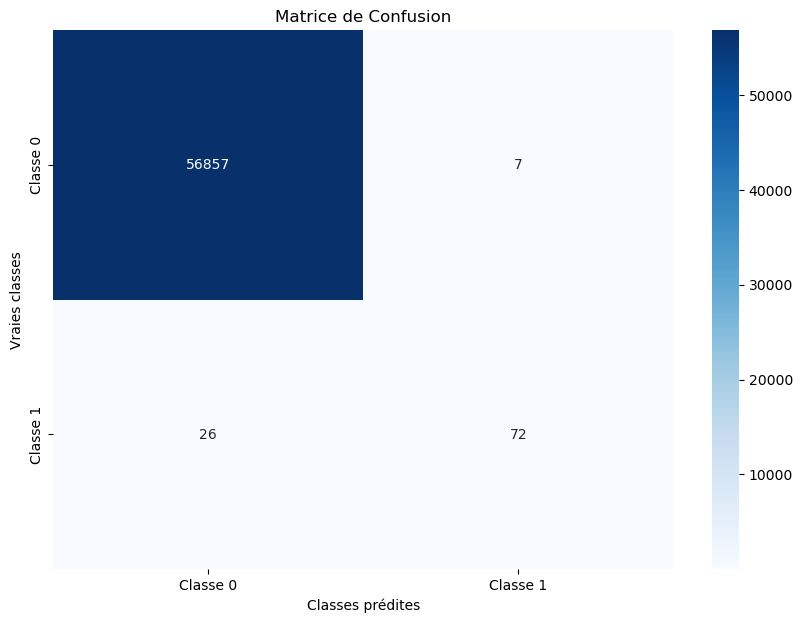

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))

sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues',xticklabels=['Classe 0', 'Classe 1'],yticklabels=['Classe 0', 'Classe 1'])
plt.ylabel('Vraies classes')
plt.xlabel('Classes prédites')
plt.title('Matrice de Confusion')

# Undersampling avec TomekLinks

In [ ]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='auto')
X_resampled_tl, y_resampled_tl = tl.fit_resample(X_train, y_train)

In [ ]:
y_resampled_tl.value_counts()

Class
0    227428
1       394
Name: count, dtype: int64

# Oversampling avec Smote

In [ ]:
from imblearn.over_sampling import SMOTE
under_over = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled_UO, y_resampled_UO = under_over.fit_resample(X_resampled_tl, y_resampled_tl)

In [ ]:
y_resampled_st.value_counts()

Class
0    227428
1    227428
Name: count, dtype: int64

In [ ]:
y_resampled_st

0         0
1         0
2         0
3         0
4         0
         ..
454851    1
454852    1
454853    1
454854    1
454855    1
Name: Class, Length: 454856, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_normalized_UO = scaler.fit_transform(X_resampled_UO)
X_test_normalized_UO = scaler.transform(X_test)

# Under-oversampling model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model_RF_UO = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF_UO.fit(X_train_normalized_UO, y_resampled_UO)
y_pred = model_RF_UO.predict(X_test_normalized_UO)
from sklearn.metrics import f1_score
F1_score= f1_score(y_test, y_pred)
F1_score

0.8497409326424872

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train_normalized_UO, y_resampled_UO)
y_pred = mlp_model.predict(X_test_normalized_UO)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.7669902912621359



# Isolation Forest

In [ ]:
cont=y.value_counts()[1]/y.value_counts()[0]
cont

0.0017304750013189597

### on a choisit un seuil de contamination =0.0017 cat on sait que nos données contiennent 0.172% d'anomalies

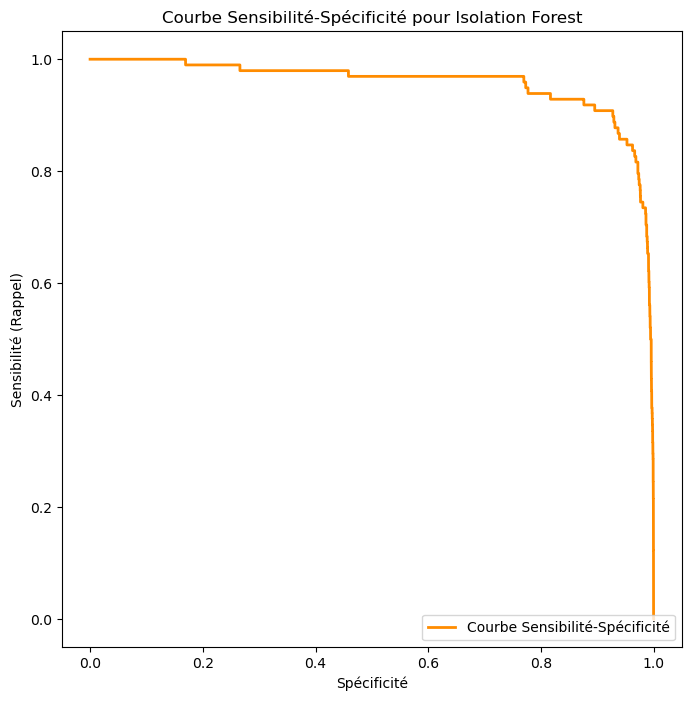

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
y_scores = IF.decision_function(X_test)
# Inverser les scores car Isolation Forest retourne des valeurs négatives
y_scores = -y_scores

# Transformer les labels en binaire (0 pour normal, 1 pour anomalie)
y_test_binary = y_test.copy()
y_test_binary[y_test == 0] = 0
y_test_binary[y_test == 1] = 1

# Calculer la courbe ROC et la zone sous la courbe
fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
# Tracer la courbe Sensibilité (rappel) en fonction de la spécificité
plt.figure(figsize=(8, 8))
plt.plot(1-fpr, tpr, color='darkorange', lw=2, label='Courbe Sensibilité-Spécificité')
plt.xlabel('Spécificité')
plt.ylabel('Sensibilité (Rappel)')
plt.title('Courbe Sensibilité-Spécificité pour Isolation Forest')
plt.legend(loc='lower right')
plt.show()

# LOF

In [ ]:
LOF=LocalOutlierFactor(contamination=cont)
y_pred =LOF.fit_predict(X)
f1 = f1_score(y, y_pred)
f1

0.9982677633395411

# Code Factorisé

In [ ]:
def visualising(df):
    print("Data Understanding")
    print("Dataframe : ", df)
    print("Missing Values count", df.isnull().sum().sum())
    print("Dataframe variables",df.describe())
    print("Visualisation")
    count_classes = pd.value_counts(df['Class'])
    count_classes.plot(kind = 'bar')
    plt.title("Transactions")
    Matrix_cor=df.corr()
    f, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(Matrix_cor, annot=True, linewidths=.5, ax=ax)

In [ ]:
def processing(df):
    X = df.drop('Class',axis=1)
    y=df['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    return X_train_normalized,X_test_normalized,y_train, y_test

In [ ]:
def RandomForest(X_train_normalized,X_test_normalized,y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_normalized, y_train)
    y_pred = model.predict(X_test_normalized)
    from sklearn.metrics import f1_score
    F1_score= f1_score(y_test, y_pred)
    y_pred_prob = model.predict_proba(X_test_normalized)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Random Forest Classifier')
    plt.legend(loc='lower right')
    plt.show()
    return {'Random Forest F1_score' : F1_score}

In [ ]:
def MLP(X_train_normalized,X_test_normalized,y_train, y_test):
    mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)
    mlp_model.fit(X_train_normalized, y_train)
    y_pred = mlp_model.predict(X_test_normalized)
    f1 = f1_score(y_test, y_pred)
    y_pred_prob = mlp_model.predict_proba(X_test_normalized)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    # Plot ROC curve
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Random Forest Classifier')
    plt.legend(loc='lower right')
    plt.show()
    return {'Random Forest F1_score' : f1}
    return {f"F1 Score: {f1}"}

In [ ]:
def Tomeklinks_Smote(X_train, y_train):
    tl = TomekLinks(sampling_strategy='auto')
    X_resampled_tl, y_resampled_tl = tl.fit_resample(X_train, y_train)
    under_over = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled_UO, y_resampled_UO = under_over.fit_resample(X_resampled_tl, y_resampled_tl)
    return X_resampled_UO, y_resampled_UO

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

df=pd.read_csv("creditcard.csv")
df=df.drop('Time',axis=1)
visualising(df)




NameError: name 'visualising' is not defined

In [ ]:
X_train_normalized,X_test_normalized,y_train, y_test=processing(df)
X_resampled_UO, y_resampled_UO=Tomeklinks_Smote(X_train_normalized,y_train)


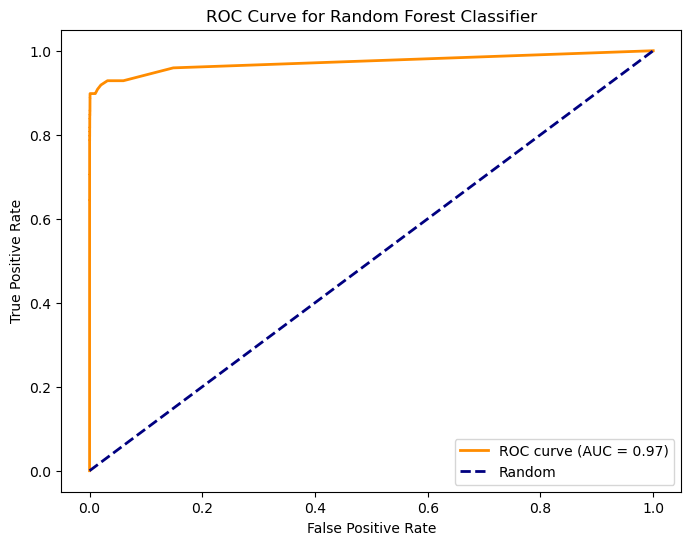

{'Random Forest F1_score': 0.837696335078534}

In [ ]:
RandomForest(X_resampled_UO,X_test_normalized, y_resampled_UO, y_test)

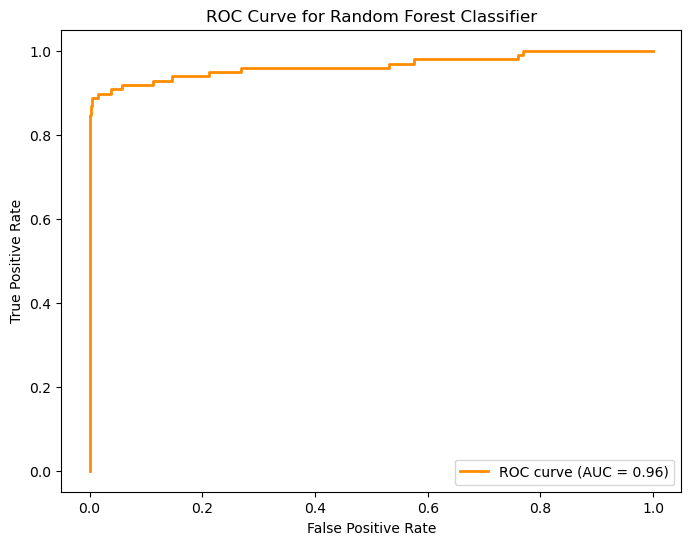

{'Random Forest F1_score': 0.7511737089201878}

In [ ]:
MLP(X_resampled_UO,X_test_normalized, y_resampled_UO, y_test)

# IF

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import train_test_split

def gridIF(X_resampled_UO, y_resampled_UO):
    best_f1_score = 0
    best_params = {'Best_Params': None}
    if_params = [5,10, 20,30, 40, 50, 100,200,300,400,500]
    for i in if_params:
        model = IsolationForest(random_state=42, contamination=0.0017, n_estimators=i)
        model.fit(X_resampled_UO)
        y_pred = model.predict(X_resampled_UO)
        y_pred = np.array([1 if y == -1 else 0 for y in y_pred])
        f1 = f1_score(y_pred,y_resampled_UO)
        if f1 > best_f1_score:
            best_f1_score = f1
            best_params['Best_Params'] = i
    return best_params

In [ ]:
def best_IF_model(X_resampled_UO,y_resampled_UO):
    results_df=gridIF(X_resampled_UO,y_resampled_UO)
    print(results_df)
    nbestimators=results_df['Best_Params']
    model = IsolationForest(n_estimators=nbestimators,contamination=0.0017,random_state=42)
    model.fit(X_resampled_UO)
    y_pred = model.predict(X_resampled_UO)
    y_pred = np.array([1 if y == -1 else 0 for y in y_pred])
    f1 = f1_score(y_pred,y_resampled_UO)
    return model,f1_score,y_pred


In [ ]:
IFmodel,f1_score,y_pred=best_IF_model(X_resampled_UO, y_resampled_UO)

In [ ]:
f1_score

0.28248587570621464

In [ ]:
y_pred_if = _.predict(X_train)
best_threshold_if = np.linspace(min(y_pred_if), max(y_pred_if), 1000)[np.argmax([f1_score(y_resampled_UO, y_pred_if > threshold) for threshold in np.linspace(min(y_pred_if), max(y_pred_if), 1000)])]


ValueError: X has 20 features, but IsolationForest is expecting 29 features as input.

In [ ]:
threshold = best_threshold_if
y_pred = (y_prob > threshold).astype(int)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr, tpr, c='red', label=f'Threshold = {threshold}', marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# LOF